In [1]:
import os

import numpy as np

import cv2

import matplotlib.pyplot as plt

In [2]:
def fin_wine_label(img, debug=True):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    if debug:
        plt.imshow(img)
        plt.show()
    
    # Гисторграмму делаем, чтобы получить гисторграмму
    x = np.sum(img, axis=1)
    # немного сглаживаем, чтобы уменьшить количество пиков
    x = moving_average(x, 20)
    # переворачиваем
    x = -x + img.shape[0]
    
    # height и distance, надо подбирать динамически, коэффециент +- работает, надо смотрет
    height = int(x.max()*2)
    peaks, _ = find_peaks(x, height=height, distance=int(img.shape[0]*0.2))
    
    if debug:
        plt.plot(x)
        plt.plot(peaks, x[peaks], "x")
        plt.show()
        
        plt.imshow(img[peaks[0]:peaks[-1], :])
        plt.show()
        
    return peaks

In [3]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

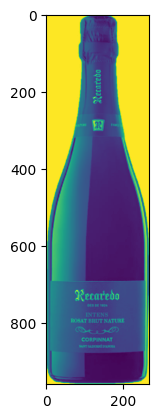

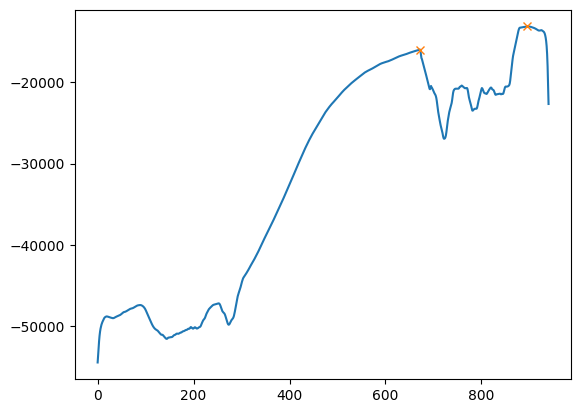

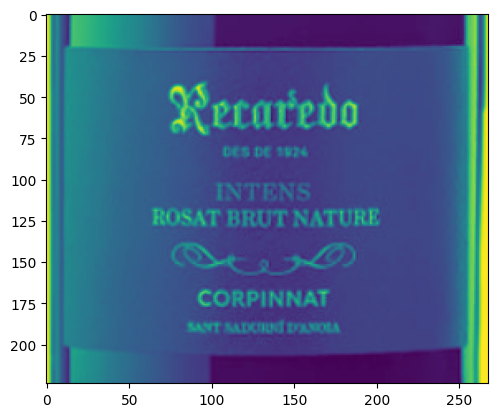

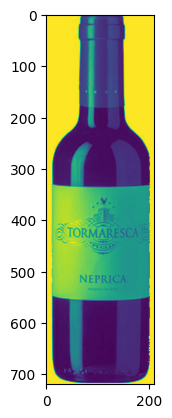

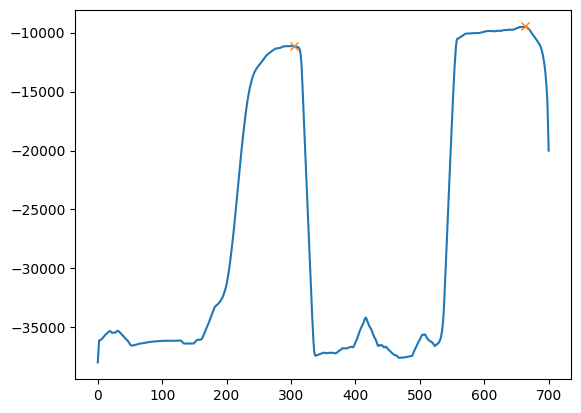

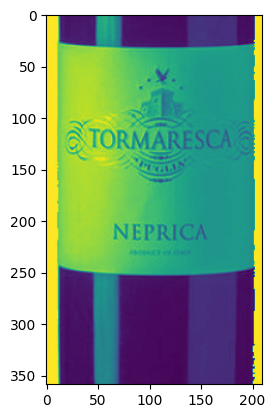

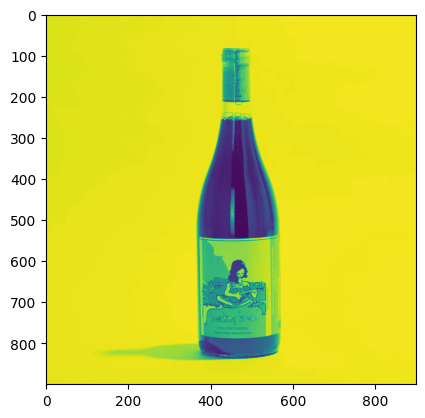

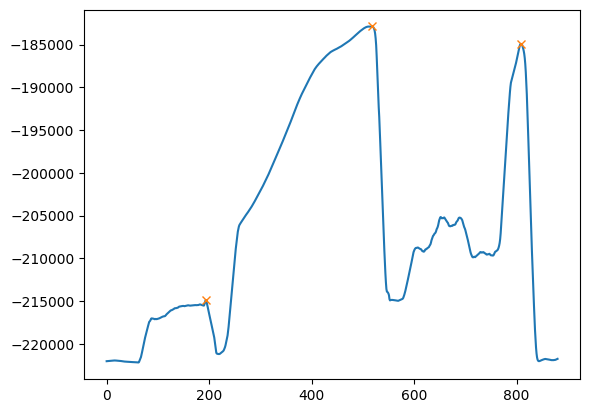

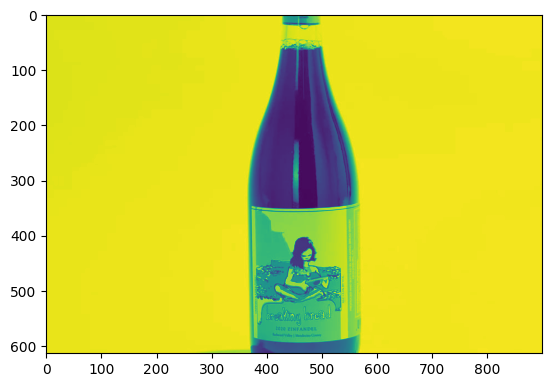

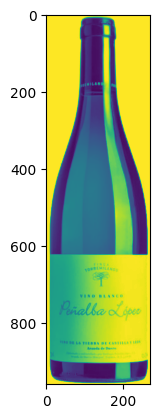

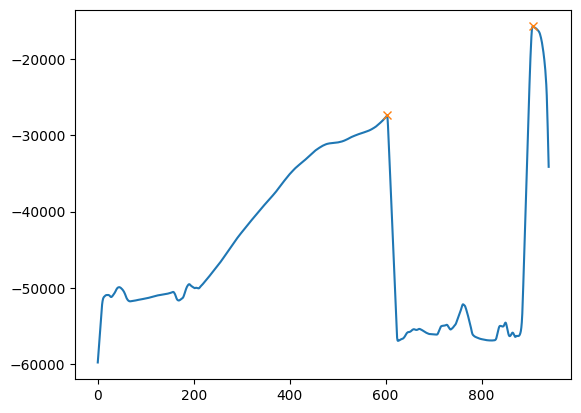

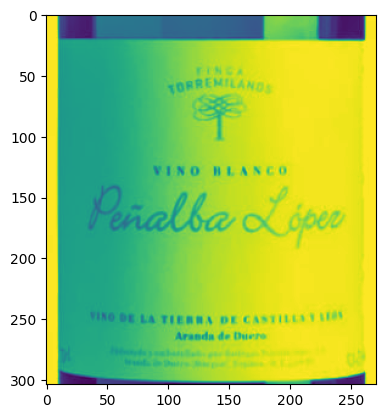

In [6]:
for img_path in [path for path in os.listdir('.') if path.endswith('.jpg')]:
    img = cv2.imread(img_path)
    fin_wine_label(img, debug=True)